## Project AOL
## Language Identification

### Anggota:
### 1. Agustinus Ardian Cakra Widiastara
### 2. Michael Leonardo
### 3. Gabriel Jehuda

In [1]:
#importing libraries
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#dataset from kaggle (https://www.kaggle.com/code/martinkk5575/language-detection/data?select=dataset.csv)
df = pd.read_csv('dataset.csv')
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [3]:
#function to remove special character (string.punctuation) using string method and changing text to lowercase
def removeSC (text):
    for SC in string.punctuation:
        text = text.replace(SC,"")
    text = text.lower()
    return(text)

In [4]:
#Example
removeSC("'abcdefs';: ! @ .py ,.;:[]")

'abcdefs   py '

In [5]:
#removing special character from df
df["Text"] = df["Text"].apply(removeSC)

In [6]:
df.shape

(22000, 2)

In [7]:
df.language.value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [8]:
#Separating Dependent and Independent Variable
x = df.iloc[:,0]
y = df.iloc[:,1]

In [9]:
#Splitting data into training set and test set
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = .2, random_state = 0)

In [10]:
xTrain

21831    傳真社發表相關調查報道後，運輸及房屋局局長張炳良否認知情。不過傳真社在月日引述政府消息人士所...
2569     industria una ferrería que solo trabaja en tie...
2976     أسس راميرو تحالف مملكتي نافارا وليون الذي استط...
18102    het olympic park werd na afloop van de spelen ...
5168     wilcoxius truncus is een vliegensoort uit de f...
                               ...                        
13123    يعد يلستون أكبر النظم الايكولوجية والبيئة من ج...
19648    tftp aktarım protokolü olarak genellikle udp k...
9845     اعترض اعضاء مجلس النواب على قرار الحل فتدخل ال...
10799    după  de treceri la periheliu cometa pierde ga...
2732     بربینک کیلیفورنیا کا رقبہ  مربع کیلومیٹر ہے او...
Name: Text, Length: 17600, dtype: object

In [11]:
xTest

19654    numerabantur octo collegia duodeviginti refugi...
7261     încleștarea regilor preia acțiunea de unde a l...
3394     jackson soloist  ağustos  tarihinden beri üret...
21584    el artículo  del código penal de la república ...
4741     alfred frenzel jablonec nad nisou  de setembro...
                               ...                        
2839     mahallede ilköğretim okulu vardır mahallenin i...
14216    作為資本主義的始祖國，英國對上述“固定電價”制度有難以接受的心理障礙，所以從年來苦心積慮地設...
12631    อุทยานแห่งชาติน้ำตกโยง ตั้งอยู่บนคาบสมุทรทำให้...
9978     اب میں تم سے ایک سوال کرتا ہوں کہ کیا تم لوگ ا...
19839    jabal ţār al qidr är ett berg i jordanien det ...
Name: Text, Length: 4400, dtype: object

In [12]:
yTrain

21831     Chinese
2569      Spanish
2976       Arabic
18102       Dutch
5168        Dutch
           ...   
13123      Arabic
19648     Turkish
9845       Arabic
10799    Romanian
2732         Urdu
Name: language, Length: 17600, dtype: object

In [13]:
yTest

19654        Latin
7261      Romanian
3394       Turkish
21584      Spanish
4741     Portugese
           ...    
2839       Turkish
14216      Chinese
12631         Thai
9978          Urdu
19839      Swedish
Name: language, Length: 4400, dtype: object

In [14]:
#Define Feature extraction
from sklearn import feature_extraction
Vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,1), analyzer="char")

In [15]:
#pipeline(model) definition
from sklearn import pipeline
from sklearn import linear_model
Logistic = linear_model.LogisticRegression(max_iter= 10000)
#Extracting feature (vec) and classifier (clf)
Model = pipeline.Pipeline([('vec', Vec), ('clf', Logistic)])

In [16]:
#Fitting model to training data
Model.fit(xTrain, yTrain)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char')),
                ('clf', LogisticRegression(max_iter=10000))])

In [17]:
#Predicting test data
yPred = Model.predict(xTest)

In [18]:
#Model Report
from sklearn.metrics import classification_report,accuracy_score
print("Accuracy of the model: ", accuracy_score(yTest, yPred))
print("\n\n")
print("Classification Report:\n")
print(classification_report(yTest, yPred))

Accuracy of the model:  0.9686363636363636



Classification Report:

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       193
     Chinese       0.99      0.99      0.99       197
       Dutch       0.93      0.93      0.93       208
     English       0.75      0.95      0.84       200
    Estonian       0.96      0.94      0.95       176
      French       0.98      0.96      0.97       196
       Hindi       1.00      0.98      0.99       192
  Indonesian       0.98      0.96      0.97       192
    Japanese       1.00      0.99      1.00       182
      Korean       1.00      0.99      1.00       204
       Latin       0.93      0.91      0.92       202
     Persian       0.99      1.00      0.99       186
   Portugese       0.96      0.88      0.91       196
      Pushto       1.00      0.95      0.98       207
    Romanian       1.00      0.98      0.99       206
     Russian       0.99      0.99      0.99       215
     Spanis

In [19]:
#Given data and predicted data
test = pd.DataFrame({"Actual": yTest, "Predicted": yPred})
test

,Actual,Predicted
19654,Latin,Latin
7261,Romanian,Romanian
3394,Turkish,Turkish
21584,Spanish,Spanish
4741,Portugese,Portugese
...,...,...
2839,Turkish,Turkish
14216,Chinese,Chinese
12631,Thai,Thai
9978,Urdu,Urdu


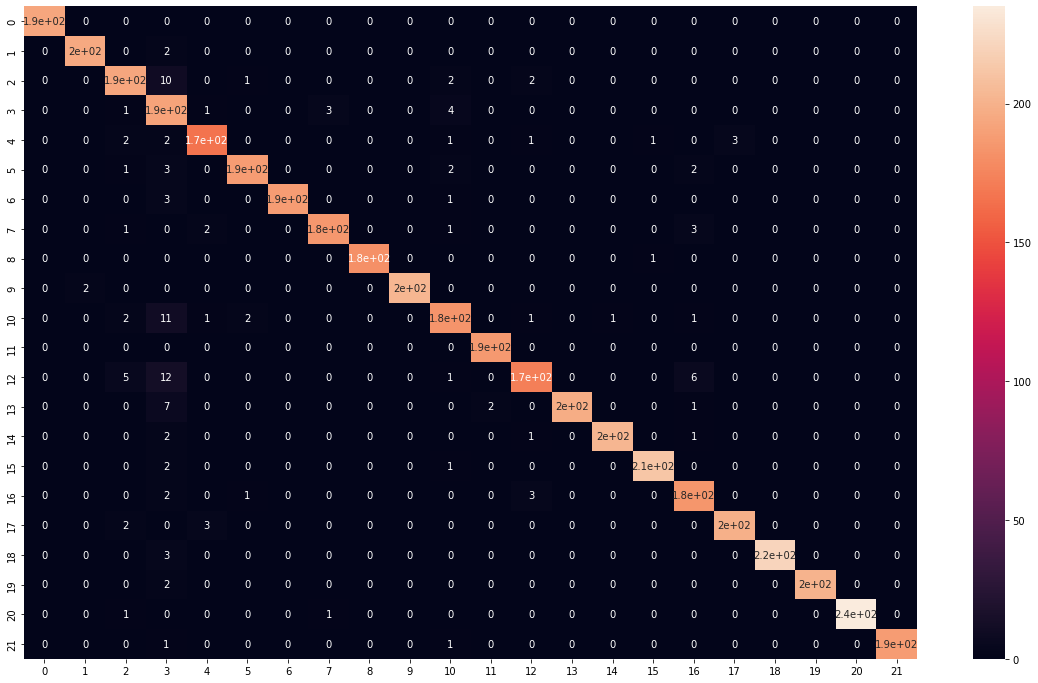

In [20]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(yTest, yPred)
plt.figure(figsize=(20,12))
sns.heatmap(CM, annot= True)
plt.show()

In [21]:
print (CM)

[[193   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 195   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 193  10   0   1   0   0   0   0   2   0   2   0   0   0   0   0
    0   0   0   0]
 [  0   0   1 191   1   0   0   3   0   0   4   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   2   2 166   0   0   0   0   0   1   0   1   0   0   1   0   3
    0   0   0   0]
 [  0   0   1   3   0 188   0   0   0   0   2   0   0   0   0   0   2   0
    0   0   0   0]
 [  0   0   0   3   0   0 188   0   0   0   1   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   1   0   2   0   0 185   0   0   1   0   0   0   0   0   3   0
    0   0   0   0]
 [  0   0   0   0   0   0   0   0 181   0   0   0   0   0   0   1   0   0
    0   0   0   0]
 [  0   2   0   0   0   0   0   0   0 202   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   2  11   1   2   0   0   0   0 183   0   1   0   1   0   1 

Testing

In [22]:
Model.predict(["傳真社發表相關調查報道後"])

array(['Chinese'], dtype=object)

In [23]:
Model.predict(["thank you for dataset!"])

array(['English'], dtype=object)

In [24]:
Model.predict(["Nama aku Michael"])

array(['Indonesian'], dtype=object)

In [25]:
Model.predict(["Tallinna vanalinna eriline väärtus seisneb eelkõige tänaseni püsinud keskaegses miljöös ja struktuuris, mis on teistest Põhja-Euroopa pealinnadest kadunud"])

array(['Estonian'], dtype=object)

In [26]:
import pickle
new_file = open("NLP model.pkl","wb")
pickle.dump(Model,new_file)
new_file.close()